In [139]:
import math
import numpy as np
import matplotlib.pyplot as plt

def _tiny():
    return np.finfo('float64').eps

def calculate_d3r(rt, last_vt, last_ddt):
    x = (rt - 0.5*last_vt) / (last_ddt + _tiny())
    y = ((last_ddt**2)*(rt - 0.5*last_vt) - 0.5*last_vt*(rt**2)) / (last_ddt**3 + _tiny())
    return (x,y)
def calculate_dsr(rt, last_vt, last_wt):
    delta_vt = rt - last_vt
    delta_wt = rt**2 - last_wt
    return (last_wt * delta_vt - 0.5 * last_vt * delta_wt) / ((last_wt - last_vt**2)**(3/2) )

# def calculate_d3r(rt, last_vt, last_ddt):
#     x = (rt - 0.5*last_vt) / (last_ddt + _tiny())
#     y = ((last_ddt**2)*(rt - 0.5*last_vt) - 0.5*last_vt*(rt**2)) / (last_ddt**3 + _tiny())
#     return (x,y)
class RiskAdjusteMetric:
    def __init__(self, last_vt,last_wt, last_ddt, last_dt2,decay_rate):
      self.last_vt = last_vt
      self.last_wt = last_wt
      self.decay_rate=decay_rate
      self.last_ddt = last_ddt
      self.last_dt2 = last_dt2
      self.last_sr = 0
      self.last_ddr = 0
      
      
    def _tiny():
        return np.finfo('float64').eps



    def update_metrics(self, rt):
        # rt = np.log(1+rt)
        dsr = calculate_dsr(rt, self.last_vt, self.last_wt)
        # d3r_cond1, d3r_cond2 = calculate_d3r(rt, self.last_vt, self.last_ddt)
        # d3r = d3r_cond1 if rt > 0 else d3r_cond2

        self.last_vt += self.decay_rate * (rt - self.last_vt)
        self.last_wt += self.decay_rate * (rt**2 - self.last_wt)

        # self.last_dt2 += self.decay_rate * (np.minimum(rt, 0)**2 - self.last_dt2)
        # self.last_ddt = math.sqrt(self.last_dt2)
        self.last_sr += self.decay_rate * dsr
        # self.last_ddr += self.decay_rate * d3r
        return dsr


In [3]:
from pandas import read_csv


df_dow =read_csv('./data/dow.csv')
df =df_dow.copy()
df = df_dow[df_dow.tic.isin( ['AAPL'])]

In [4]:
returns = df['close'].pct_change()

In [161]:
import numpy as np

def calculate_dsr(rt, last_vt, last_wt):
    delta_vt = rt - last_vt
    delta_wt = rt**2 - last_wt
    return (last_wt * delta_vt - (0.5 * last_vt * delta_wt)) / ((last_wt - last_vt**2)**(3/2) + np.finfo('float64').eps)
class RiskAdjusteMetric:
    def __init__(self,decay_rate):
      self.last_vt = 0
      self.last_wt = 0
      self.step = 0
      self.decay_rate=decay_rate
      self.last_sr = 0      
    

    def update_metrics(self, rt):
        self.step+=1
        if self.step>20:
          dsr = calculate_dsr(rt, self.last_vt, self.last_wt)
        else:
          dsr =0
        self.last_vt += self.decay_rate * (rt - self.last_vt)
        self.last_wt += self.decay_rate * (rt**2 - self.last_wt)
        self.last_sr += self.decay_rate * dsr
        return dsr


In [154]:
returns = np.random.normal(0,0.05,10000)

In [166]:
estimator = RiskAdjusteMetric(0.0001)
dsrs = []
for i,item in enumerate(returns):
 dsrs.append(estimator.update_metrics(item))


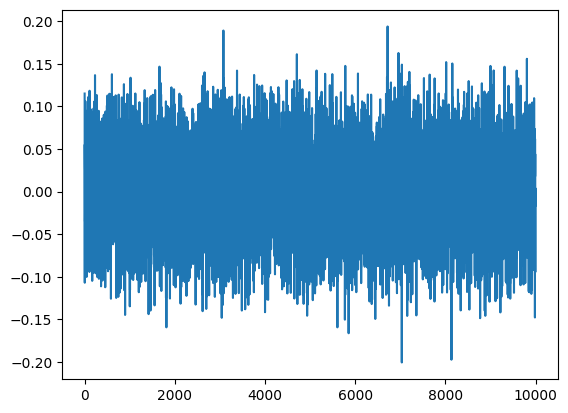

In [159]:
import pandas as pd


plt.plot(returns)
plt.show()

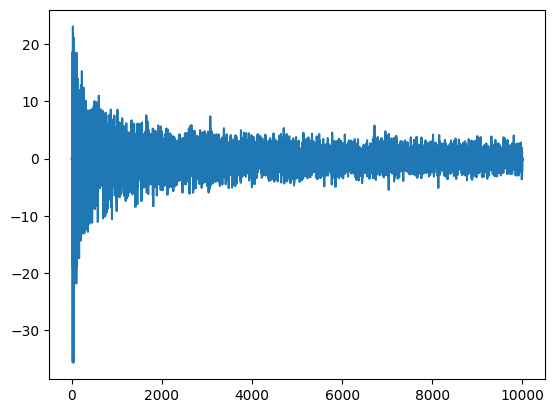

In [167]:
import pandas as pd


plt.plot(pd.Series(dsrs))
plt.show()

In [168]:
pd.Series(returns).pct_change()[1:].mean()/pd.Series(returns).pct_change()[1:].std()

-0.006339811691576916

In [169]:
estimator.last_sr

-0.024854970249558083

In [123]:
df['close'].pct_change()[1:].mean()/df['close'].pct_change()[1:].std()


0.042591706397122536

In [2]:
import numpy as np

# 2D array with shape (3, 2)
b = np.array([[4, 5],
              [7, 8],
              [10, 11]])

# 1D array with 3 elements
a = np.array([1, 2, 3])

# Reshape a to a column vector (shape becomes (3, 1))
a_col = a[:, np.newaxis]

# Concatenate along columns (axis=1)
result = np.concatenate((a_col,b), axis=1)

print(result)


[[ 1  4  5]
 [ 2  7  8]
 [ 3 10 11]]


In [ ]:
import numpy as np

tensor_3d = np.random.rand(1, 4, 3)  # Example 3D tensor of shape (5,4,3)
print(tensor_3d)
first_layer = tensor_3d[0, :, -1]      # Extract first layer as 2D (4,3)
first_layer = first_layer[:,np.newaxis]
first_layer

[[[0.58829177 0.07671598 0.98299035]
  [0.11018302 0.7689991  0.82814679]
  [0.02824905 0.25478077 0.00996102]
  [0.31344381 0.3061169  0.55196961]]]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [1]:
import torch

# Example 2D tensor with shape (batch_size=2, 3, 4)
tensor_2d = torch.tensor([
    [[1, 2, 3, 4], 
     [5, 6, 7, 8], 
     [9, 10, 11, 12]],
    
    [[13, 14, 15, 16], 
     [17, 18, 19, 20], 
     [21, 22, 23, 24]]
])

print("Original shape:", tensor_2d.shape)
flattened = torch.flatten(tensor_2d, start_dim=1)
print("Flattened shape:", flattened.shape)
print(flattened)


Original shape: torch.Size([2, 3, 4])
Flattened shape: torch.Size([2, 12])
tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])


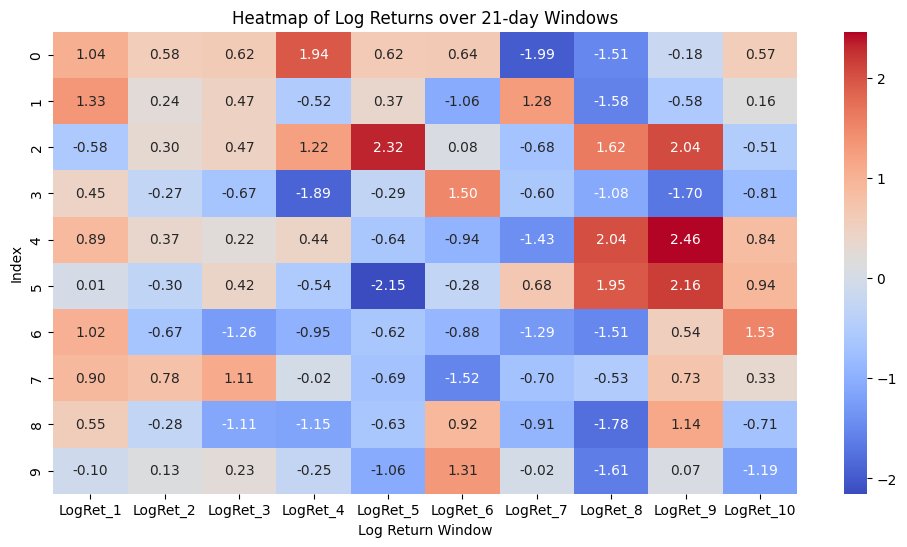

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define m
m = 10  # Change this to any value you need

# Create the matrix
weights = np.arange(1, m + 1)
volatility = np.arange(1, m + 1)
log_returns = np.random.randn(m, m)  # Simulated log returns

# Combine into a DataFrame
columns = ['Weights', 'Volatility'] + [f'LogRet_{i+1}' for i in range(m)]
data = np.column_stack((weights, volatility, log_returns))
df = pd.DataFrame(data, columns=columns)

# Heatmap of Log Returns
plt.figure(figsize=(12, 6))
sns.heatmap(df.iloc[:, 2:], cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap of Log Returns over 21-day Windows")
plt.xlabel("Log Return Window")
plt.ylabel("Index")
plt.show()


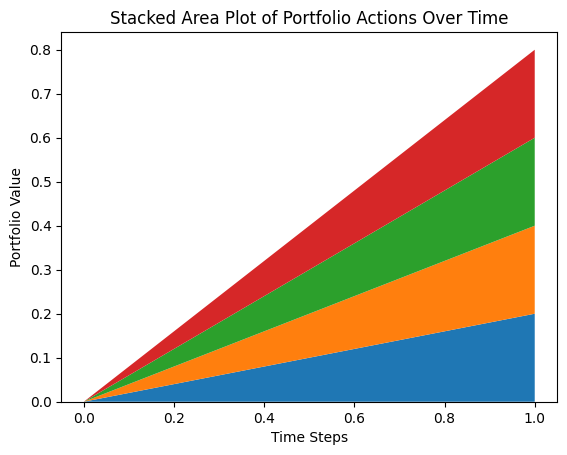

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (simulate 2 time steps, portfolio_size 4)
portfolio_size = 4  # Set your portfolio size
num_steps = 2  # Number of time steps
actions_memory = [
    [0, 0, 0, 0],  # Portfolio values at time step 1
    [0.2, 0.2, 0.2, 0.2]  # Portfolio values at time step 2
]

# Transpose the list of lists so that each list corresponds to an action over time
actions_memory = np.array(actions_memory).T  # Transpose the data to have each row as a separate stack

# Now you can plot it as a stacked area plot
plt.stackplot(range(num_steps), *actions_memory)
plt.xlabel('Time Steps')
plt.ylabel('Portfolio Value')
plt.title('Stacked Area Plot of Portfolio Actions Over Time')
plt.show()


In [2]:
import numpy as np
weights =np.array([0.2,0.2,0.2,0.2]) 
last_weights = np.array([1,0.2,0.2,0.2]) 
portfolio_value = 1000
comission_fee_pct = 0.002
last_mu = 1
mu = 1 - 2 * comission_fee_pct + comission_fee_pct**2
while abs(mu - last_mu) > 1e-10:
    last_mu = mu
    # Calculate the total transaction cost for all assets
    transaction_cost = (2 * comission_fee_pct - comission_fee_pct**2) * np.sum(np.abs(last_weights - mu * weights))
    # Update mu
    mu = (1 - transaction_cost) 

portfolio_value = mu * portfolio_value
portfolio_value

996.7929476951097

In [1]:
import torch
from torch import nn
seed = 42
torch.manual_seed(seed)
input = torch.randn( 6, 10, 5)
# With default parameters
m = nn.Flatten()
output = m(input)
output.shape
#
input.view(-1)

tensor([ 1.9269e+00,  1.4873e+00,  9.0072e-01, -2.1055e+00,  6.7842e-01,
        -1.2345e+00, -4.3067e-02, -1.6047e+00, -7.5214e-01,  1.6487e+00,
        -3.9248e-01, -1.4036e+00, -7.2788e-01, -5.5943e-01, -7.6884e-01,
         7.6245e-01,  1.6423e+00, -1.5960e-01, -4.9740e-01,  4.3959e-01,
        -7.5813e-01,  1.0783e+00,  8.0080e-01,  1.6806e+00,  1.2791e+00,
         1.2964e+00,  6.1047e-01,  1.3347e+00, -2.3162e-01,  4.1759e-02,
        -2.5158e-01,  8.5986e-01, -1.3847e+00, -8.7124e-01, -2.2337e-01,
         1.7174e+00,  3.1888e-01, -4.2452e-01,  3.0572e-01, -7.7459e-01,
        -1.5576e+00,  9.9564e-01, -8.7979e-01, -6.0114e-01, -1.2742e+00,
         2.1228e+00, -1.2347e+00, -4.8791e-01, -9.1382e-01, -6.5814e-01,
         7.8024e-02,  5.2581e-01, -4.8799e-01,  1.1914e+00, -8.1401e-01,
        -7.3599e-01, -1.4032e+00,  3.6004e-02, -6.3477e-02,  6.7561e-01,
        -9.7807e-02,  1.8446e+00, -1.1845e+00,  1.3835e+00,  1.4451e+00,
         8.5641e-01,  2.2181e+00,  5.2317e-01,  3.4

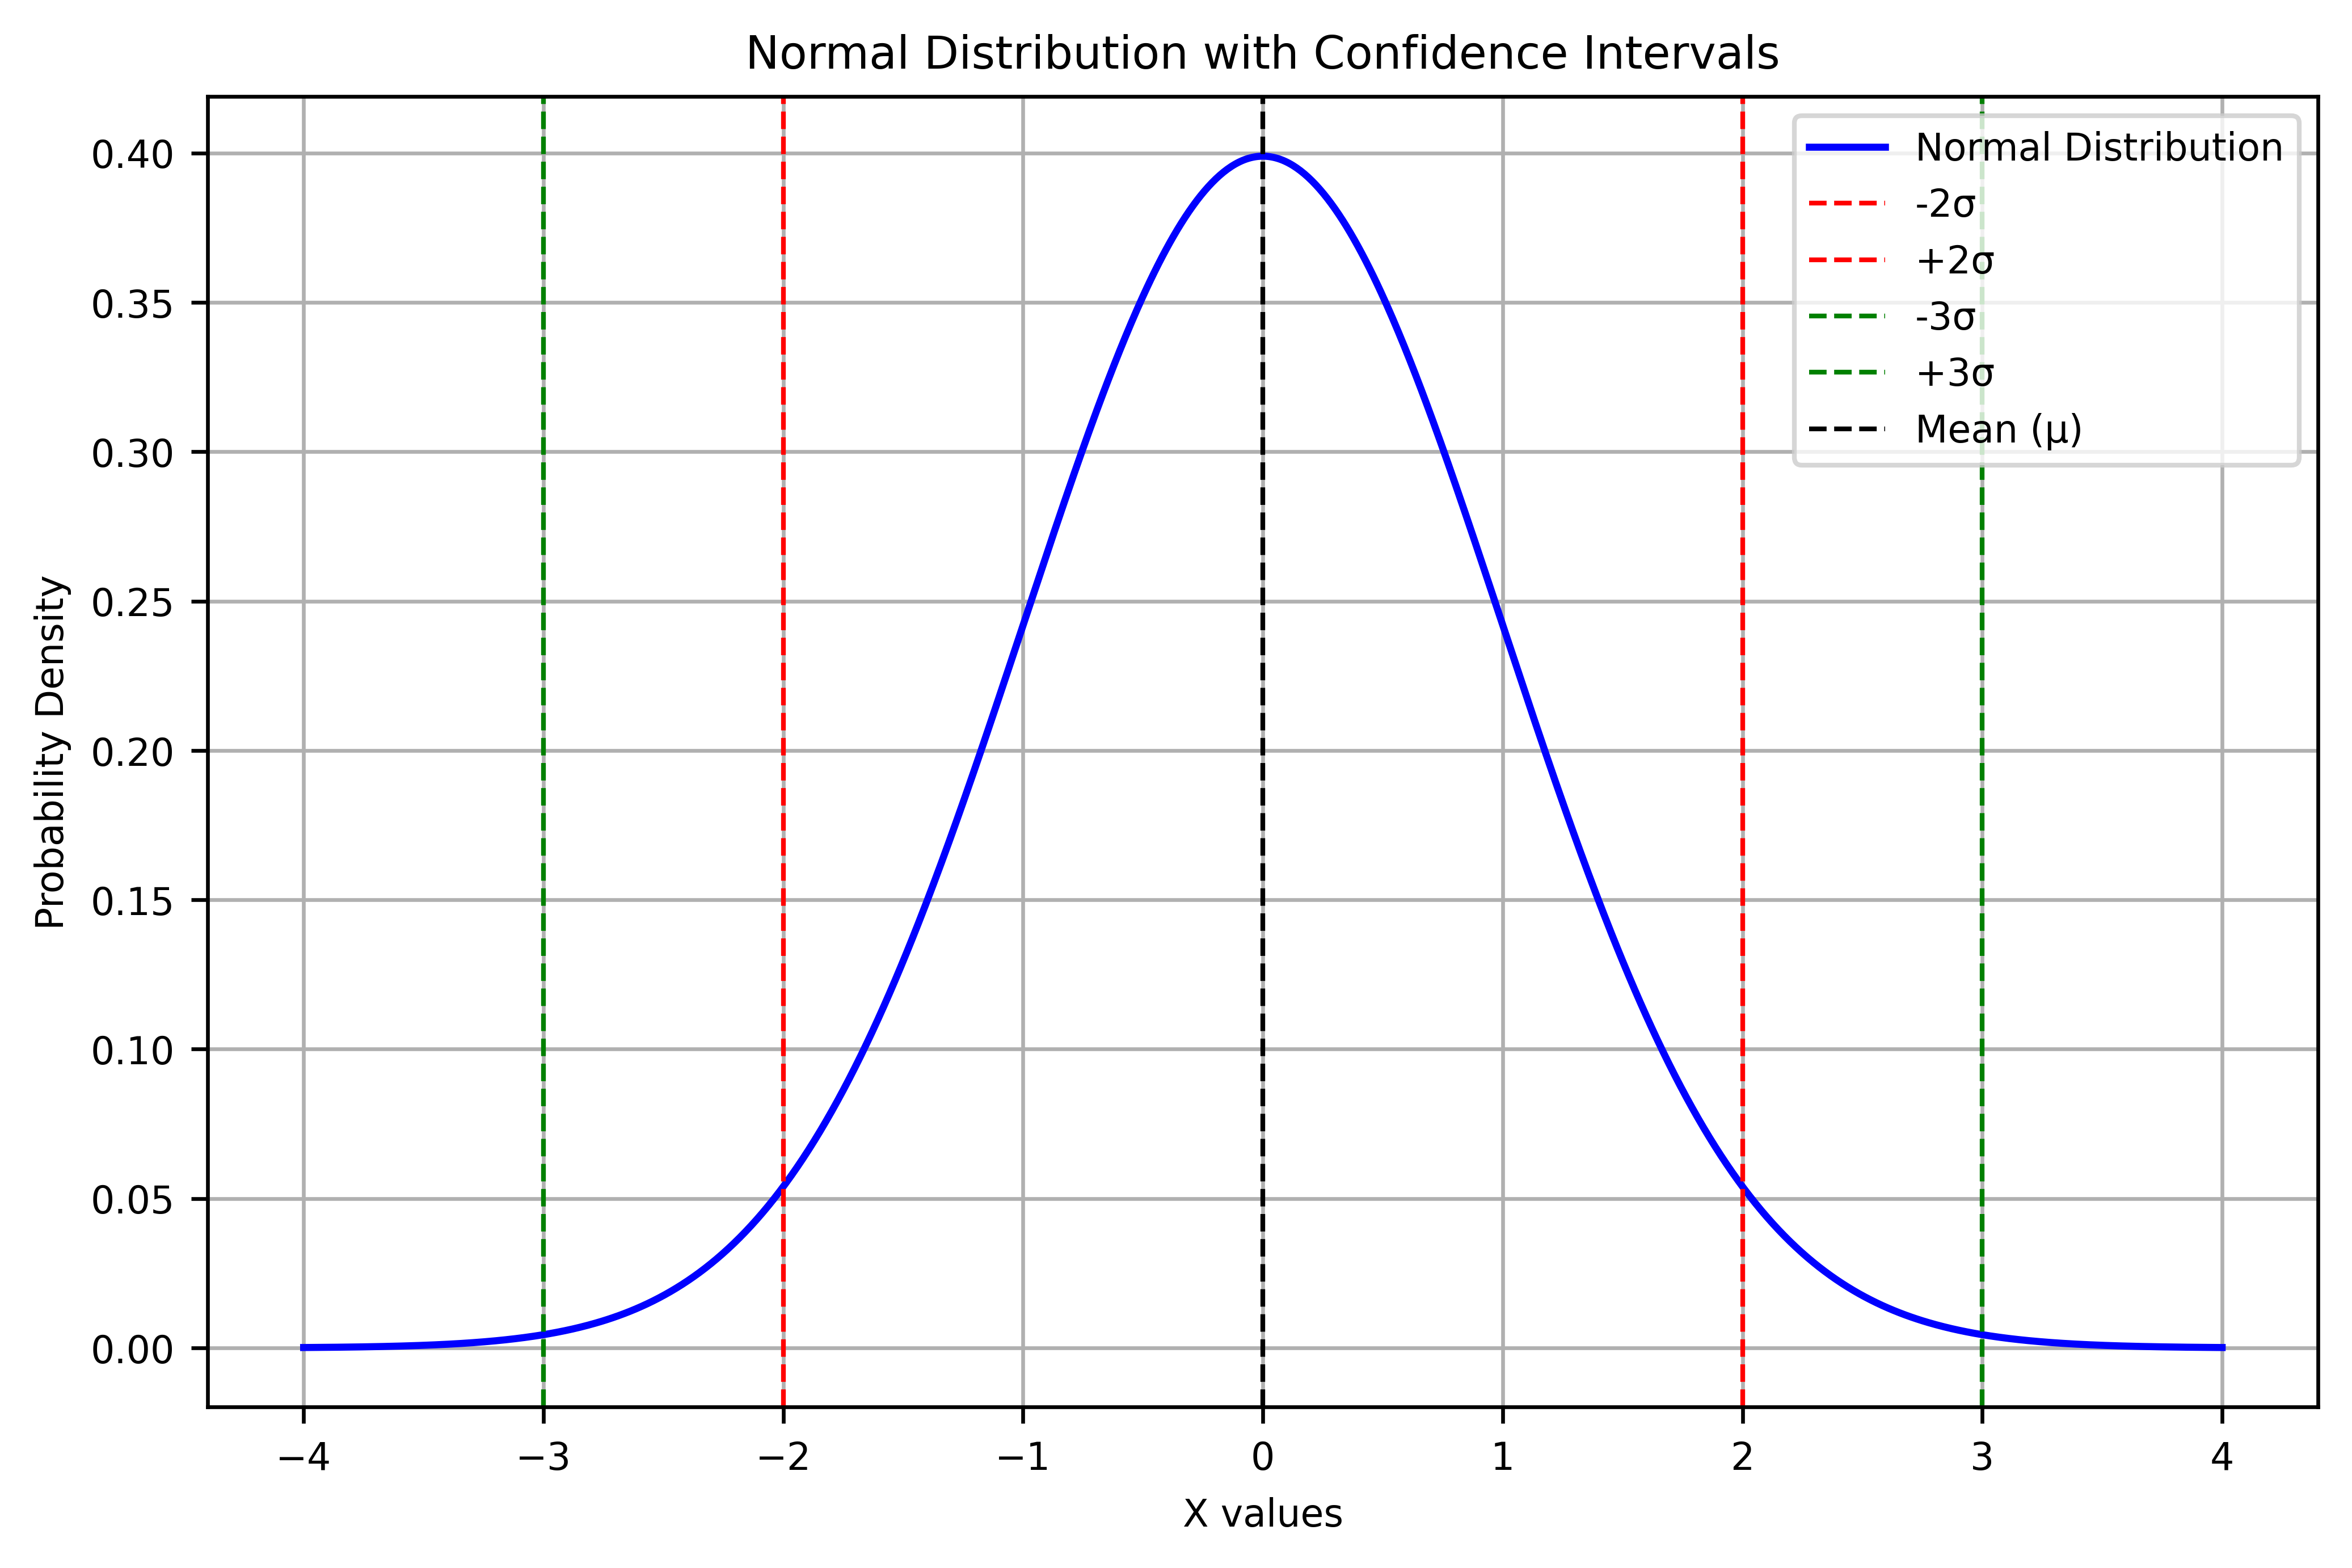

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scienceplots
import matplotlib
%matplotlib inline

with plt.style.context( 'ieee'):
    plt.rcParams.update({
    "font.family": "sans-serif",  
    "font.serif": ["Times"],  
    })   
    # Define mean and standard deviation
    mu, sigma = 0, 1

    # Generate x values
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = stats.norm.pdf(x, mu, sigma)

    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="Normal Distribution", color="blue")

    # Confidence intervals (68%, 95%, 99.7%) using dashed lines
    conf_intervals = [2, 3]  # 1σ, 2σ, 3σ
    colors = ["red", "green", "orange"]

    for k, color in zip(conf_intervals, colors):
        plt.axvline(mu - k * sigma, color=color, linestyle='dashed', linewidth=1, label=f"-{k}σ")
        plt.axvline(mu + k * sigma, color=color, linestyle='dashed', linewidth=1, label=f"+{k}σ")

    # Labels and legend
    plt.axvline(mu, color='black', linestyle='dashed', linewidth=1, label="Mean (μ)")
    plt.xlabel("X values")
    plt.ylabel("Probability Density")
    plt.title("Normal Distribution with Confidence Intervals")
    plt.legend()
    plt.grid()
    plt.savefig('normal_dist.png',dpi=200)
    plt.show()
    # Show the plot


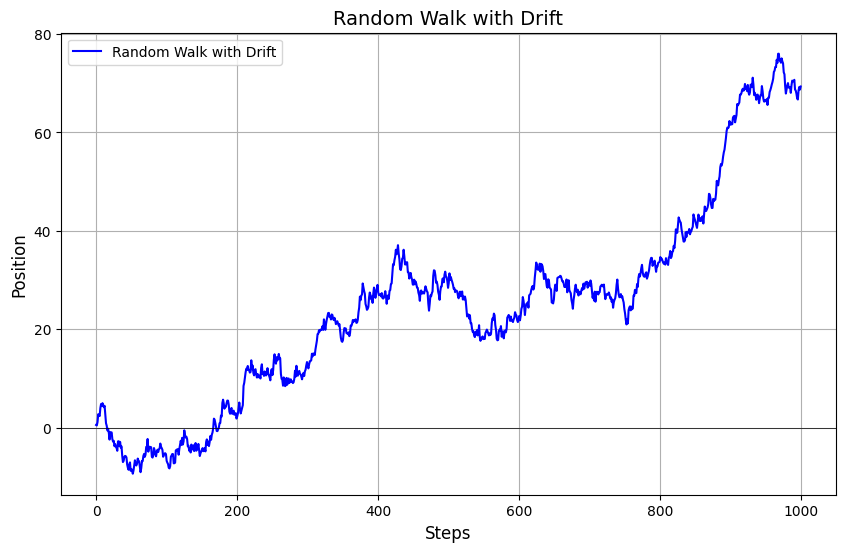

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the random walk
n_steps = 1000  # Number of steps in the random walk
drift = 0.05    # Drift per step (the deterministic bias in the movement)
step_size = 1   # Size of each random step
seed = 42       # Random seed for reproducibility

# Set the random seed for reproducibility
np.random.seed(seed)

# Generate random steps from a normal distribution (mean = 0, std = 1)
random_steps = np.random.normal(loc=0, scale=step_size, size=n_steps)

# Create the drift vector (a constant drift added at each step)
drift_vector = np.full(n_steps, drift)

# Combine the random steps with the drift (random walk with drift)
walk = np.cumsum(random_steps + drift_vector)

# Plotting the random walk with drift
plt.figure(figsize=(10, 6))
plt.plot(walk, label="Random Walk with Drift", color='blue')
plt.title("Random Walk with Drift", fontsize=14)
plt.xlabel("Steps", fontsize=12)
plt.ylabel("Position", fontsize=12)
plt.axhline(0, color='black',linewidth=0.5)  # Horizontal line at y=0
plt.grid(True)
plt.legend()
plt.show()



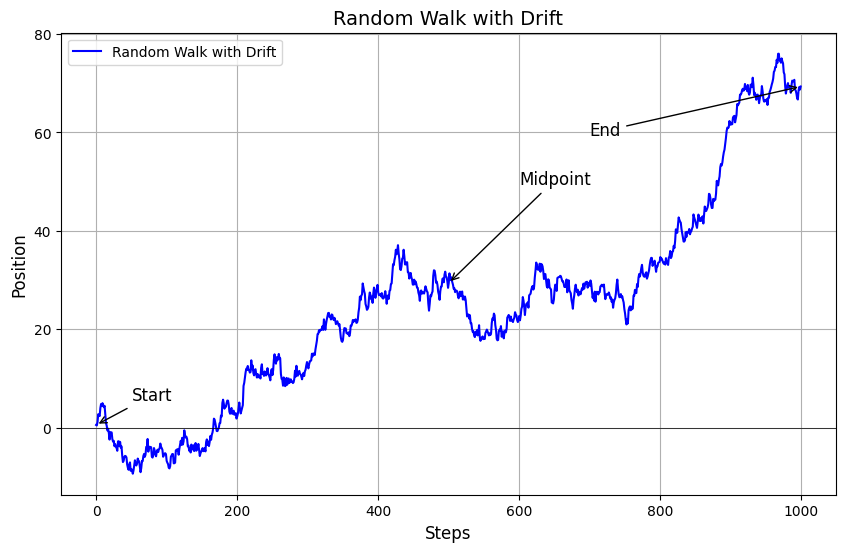

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the random walk
n_steps = 1000  # Number of steps in the random walk
drift = 0.05    # Drift per step (the deterministic bias in the movement)
step_size = 1   # Size of each random step
seed = 42       # Random seed for reproducibility

# Set the random seed for reproducibility
np.random.seed(seed)

# Generate random steps from a normal distribution (mean = 0, std = 1)
random_steps = np.random.normal(loc=0, scale=step_size, size=n_steps)

# Create the drift vector (a constant drift added at each step)
drift_vector = np.full(n_steps, drift)

# Combine the random steps with the drift (random walk with drift)
walk = np.cumsum(random_steps + drift_vector)

# Plotting the random walk with drift
plt.figure(figsize=(10, 6))
plt.plot(walk, label="Random Walk with Drift", color='blue')

# Add a title and labels
plt.title("Random Walk with Drift", fontsize=14)
plt.xlabel("Steps", fontsize=12)
plt.ylabel("Position", fontsize=12)

# Annotate key points
plt.axhline(0, color='black',linewidth=0.5)  # Horizontal line at y=0
plt.grid(True)
plt.legend()

# Annotate the start (first point)
plt.annotate('Start', xy=(0, walk[0]), xytext=(50, walk[0] + 5),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=12)

# Annotate the end (last point)
plt.annotate('End', xy=(n_steps-1, walk[-1]), xytext=(n_steps-300, walk[-1] - 10),
             arrowprops=dict(facecolor='red', arrowstyle="->"),
             fontsize=12)

# Annotate a middle point for visual demonstration
midpoint = n_steps // 2
plt.annotate('Midpoint', xy=(midpoint, walk[midpoint]), xytext=(midpoint+100, walk[midpoint] + 20),
             arrowprops=dict(facecolor='green', arrowstyle="->"),
             fontsize=12)

# Show the plot
plt.show()


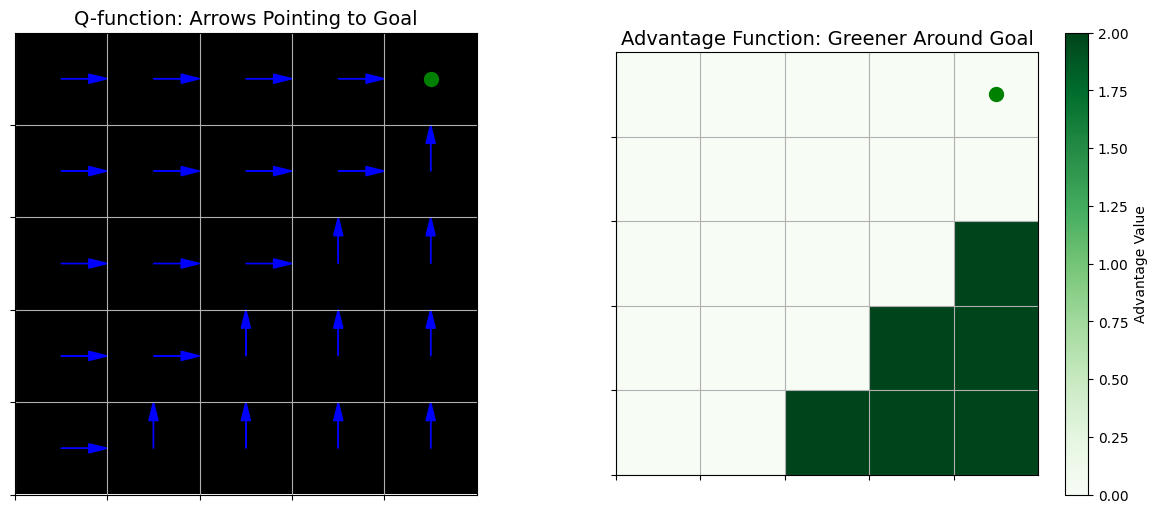

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple grid maze
maze_size = (5, 5)
maze = np.zeros(maze_size)  # Empty maze

# Place a goal in the maze (let's say the goal is at position (4, 4))
goal_pos = (4, 4)

# Assign some random rewards and penalties for the states (for simplicity)
rewards = np.random.uniform(-1, 1, size=maze_size)  # Random rewards between -1 and 1
rewards[goal_pos] = 10  # Reward for reaching the goal

# Example Q-function for a 5x5 grid (for 4 possible actions: up, down, left, right)
# Here, we create random Q-values for each state-action pair.
Q_values = np.random.uniform(-1, 1, size=(maze_size[0], maze_size[1], 4))  # 4 actions per state

# Compute the advantage function: A(s, a) = Q(s, a) - V(s), where V(s) is the average Q-value at state s
V_values = np.max(Q_values, axis=2)  # State-value is the maximum Q-value for each state
A_values = Q_values - V_values[:, :, np.newaxis]  # Advantage function

# Function to compute the direction toward the goal
def get_direction_to_goal(start, goal):
    # Calculate the vector from the current state to the goal
    dy = goal[0] - start[0]
    dx = goal[1] - start[1]
    
    # Create a simple decision rule for direction
    if abs(dy) > abs(dx):  # Priority to vertical movement (up/down)
        return 0 if dy < 0 else 1  # Up (0) or Down (1)
    else:  # Priority to horizontal movement (left/right)
        return 2 if dx < 0 else 3  # Left (2) or Right (3)

# Function to plot the Q-function and Advantage function
def plot_maze_with_q_and_adv(maze_size, Q_values, A_values, goal_pos):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Q-function visualization (with arrows pointing to the goal)
    ax = axes[0]
    ax.set_title("Q-function: Arrows Pointing to Goal", fontsize=14)
    ax.imshow(maze, cmap='gray', origin='upper', extent=[0, maze_size[1], 0, maze_size[0]])

    # Add arrows to the Q-function plot (arrows pointing to the goal)
    for i in range(maze_size[0]):
        for j in range(maze_size[1]):
            if (i, j) == goal_pos:
                continue  # Skip the goal cell (no arrow here)
            
            # Get direction towards the goal for the current cell
            direction_to_goal = get_direction_to_goal((i, j), goal_pos)
            
            if direction_to_goal == 0:  # Up
                ax.arrow(j + 0.5, i + 0.5, 0, -0.3, head_width=0.1, head_length=0.2, fc='blue', ec='blue')
            elif direction_to_goal == 1:  # Down
                ax.arrow(j + 0.5, i + 0.5, 0, 0.3, head_width=0.1, head_length=0.2, fc='blue', ec='blue')
            elif direction_to_goal == 2:  # Left
                ax.arrow(j + 0.5, i + 0.5, -0.3, 0, head_width=0.1, head_length=0.2, fc='blue', ec='blue')
            elif direction_to_goal == 3:  # Right
                ax.arrow(j + 0.5, i + 0.5, 0.3, 0, head_width=0.1, head_length=0.2, fc='blue', ec='blue')

    # Highlight the goal with a green dot (no arrow)
    ax.plot(goal_pos[1] + 0.5, goal_pos[0] + 0.5, 'go', markersize=10)
    
    ax.set_xticks(np.arange(0, maze_size[1], 1))
    ax.set_yticks(np.arange(0, maze_size[0], 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)

    # Advantage function visualization (greener around the goal)
    ax = axes[1]
    ax.set_title("Advantage Function: Greener Around Goal", fontsize=14)
    
    # Create a mask for cells within two steps from the goal
    distance_to_goal = np.zeros(maze_size)
    for i in range(maze_size[0]):
        for j in range(maze_size[1]):
            distance_to_goal[i, j] = np.abs(goal_pos[0] - i) + np.abs(goal_pos[1] - j)
    
    # Set high advantage in the goal and two neighboring cells
    advantage_around_goal = np.max(A_values, axis=2)
    # Mask for goal and two cells around it
    mask = (distance_to_goal <= 2)  # Distance within 2 cells from the goal
    advantage_around_goal[mask] += 2  # Increase the advantage in these cells

    # Color the advantage function with stronger concentration around the goal
    cax = ax.imshow(advantage_around_goal, cmap='Greens', interpolation='nearest', origin='upper', extent=[0, maze_size[1], 0, maze_size[0]])
    fig.colorbar(cax, ax=ax, label="Advantage Value")
    
    # Mark the goal position distinctly
    ax.plot(goal_pos[1] + 0.5, goal_pos[0] + 0.5, 'go', markersize=10)

    ax.set_xticks(np.arange(0, maze_size[1], 1))
    ax.set_yticks(np.arange(0, maze_size[0], 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)

    plt.show()

# Plot the Q-function and Advantage function with the goal
plot_maze_with_q_and_adv(maze_size, Q_values, A_values, goal_pos)


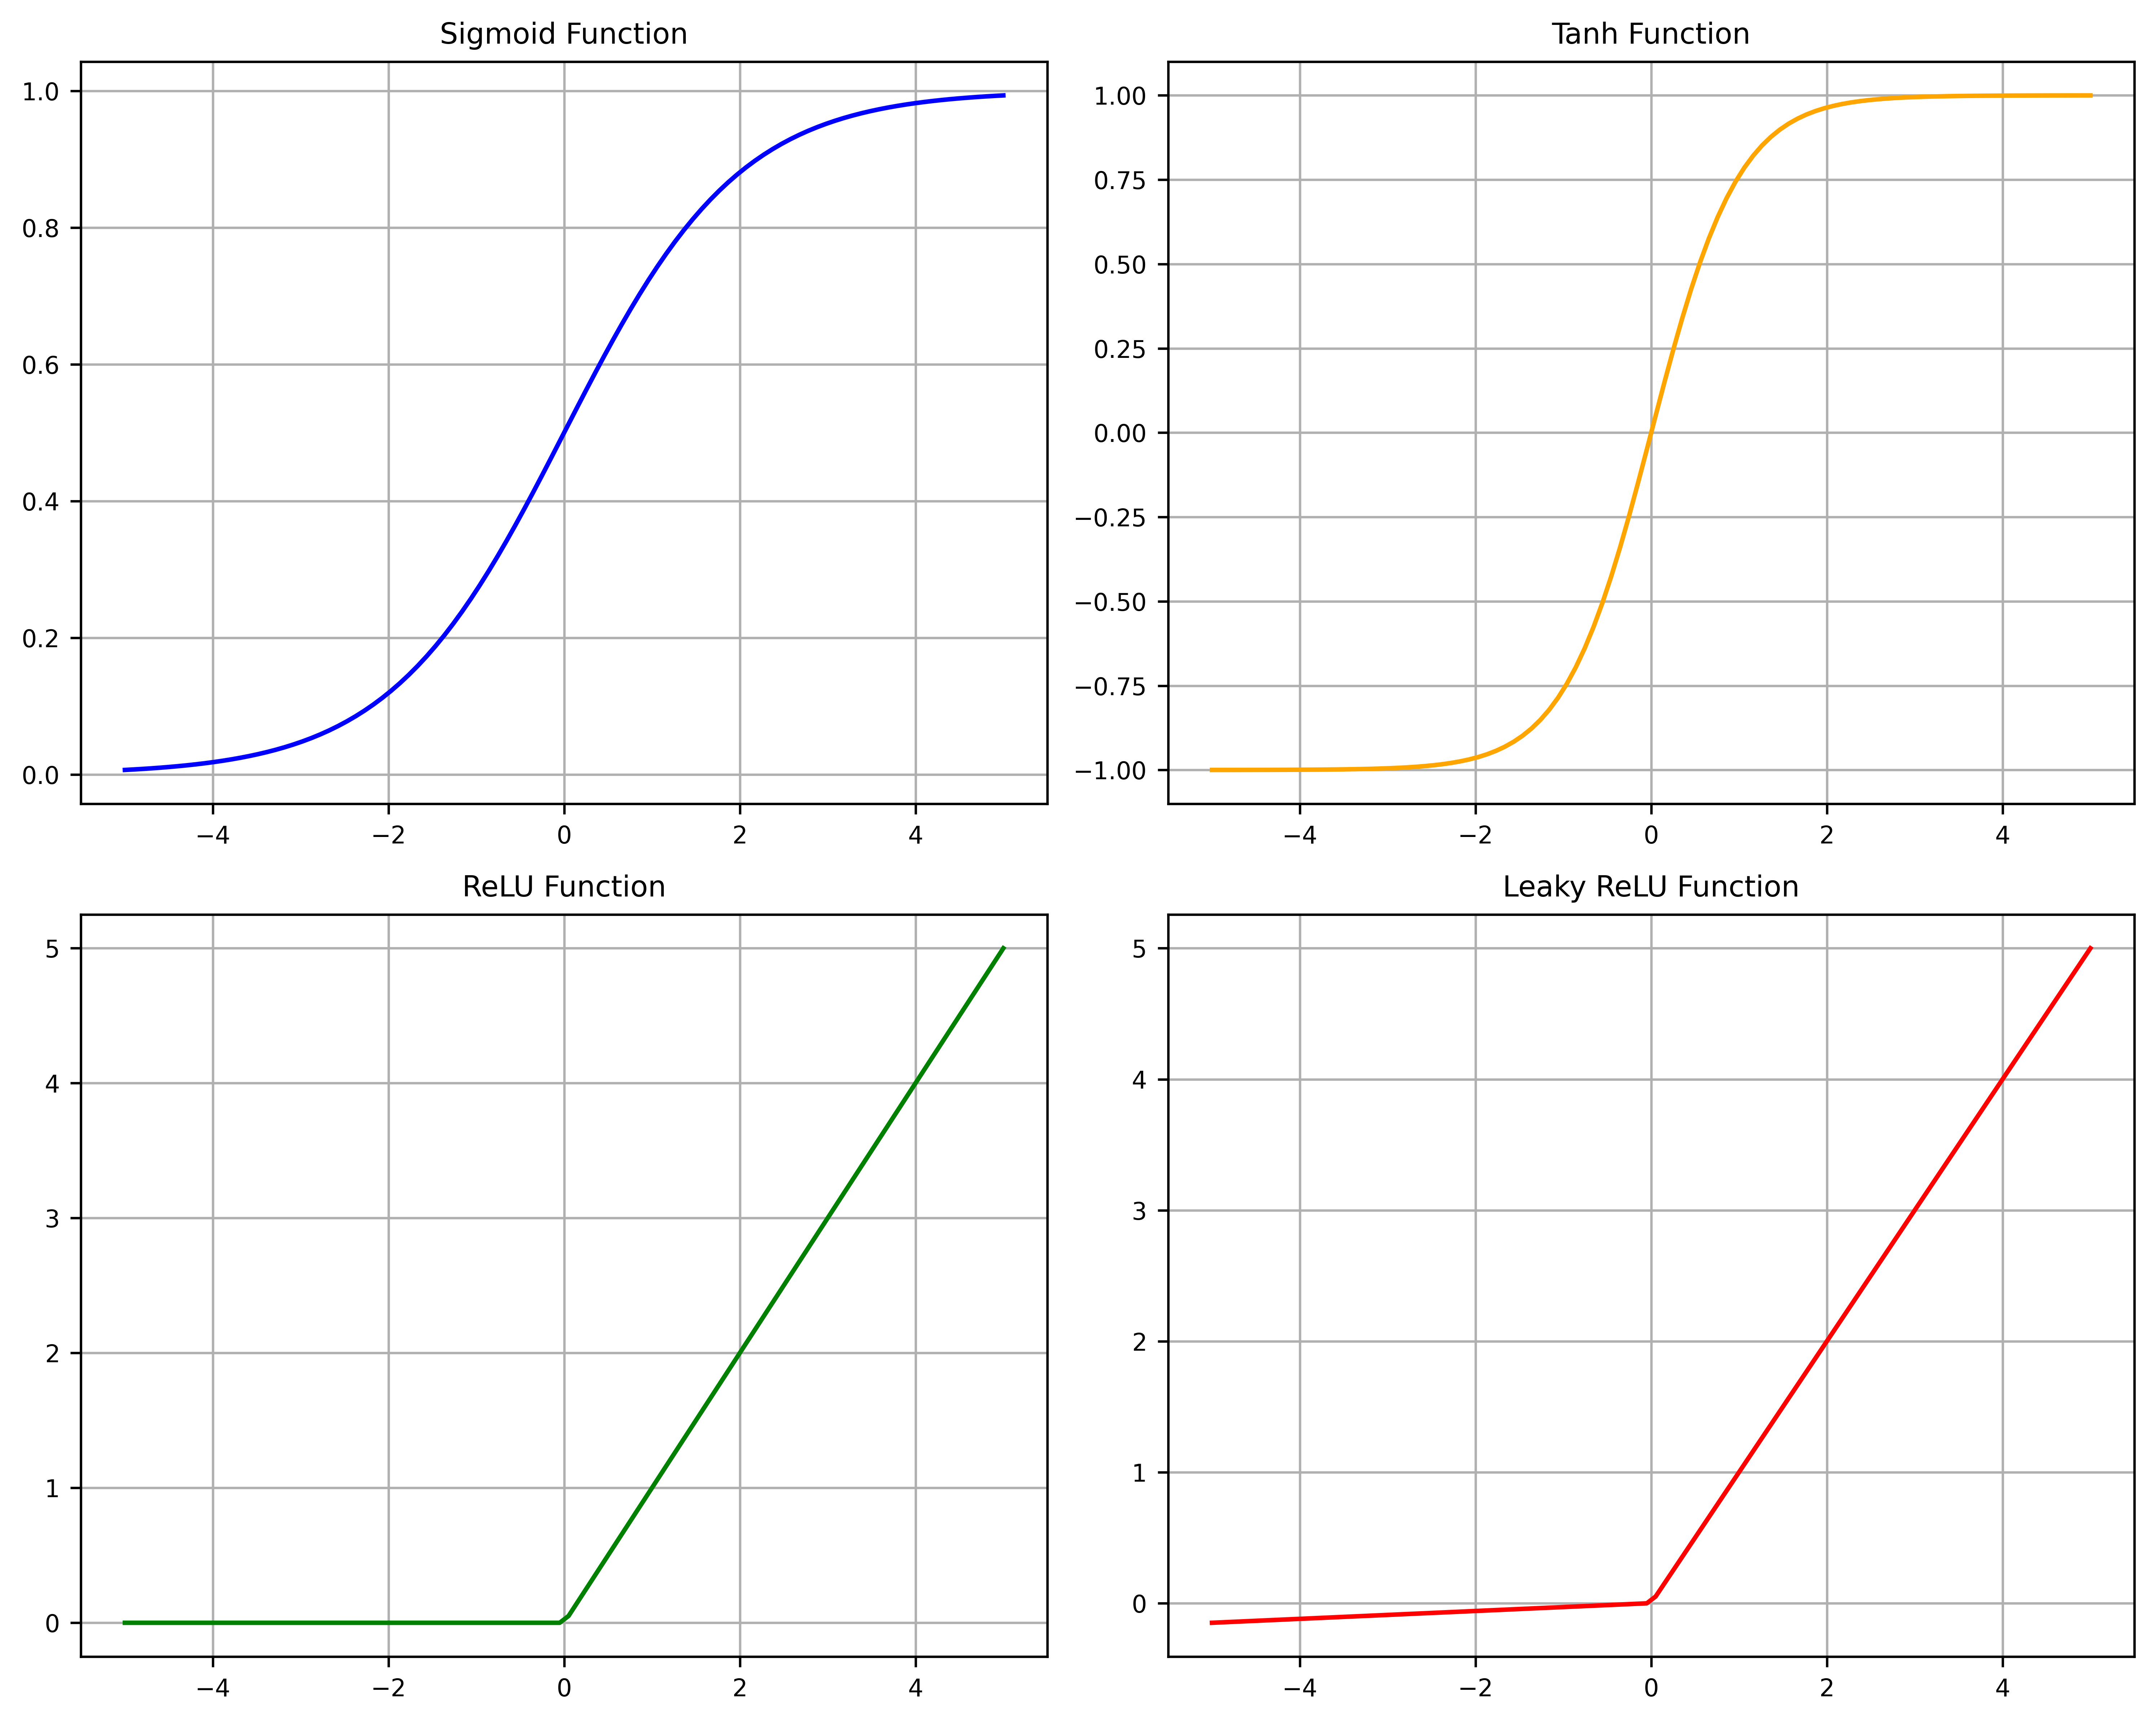

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.03):
    return np.where(x > 0, x, alpha * x)

# Create an input range for the x-axis
x = np.linspace(-5, 5, 100)
with plt.style.context( 'ieee','science'):
    plt.rcParams.update({
    "font.family": "sans-serif",  
    "font.serif": ["Times"],  
    })   
    # Create subplots for each activation function
    plt.figure(figsize=(10, 8))

    # Sigmoid plot
    plt.subplot(2, 2, 1)
    plt.plot(x, sigmoid(x), label='Sigmoid', color='blue')
    plt.title("Sigmoid Function")
    plt.grid(True)

    # Tanh plot
    plt.subplot(2, 2, 2)
    plt.plot(x, tanh(x), label='Tanh', color='orange')
    plt.title("Tanh Function")
    plt.grid(True)

    # ReLU plot
    plt.subplot(2, 2, 3)
    plt.plot(x, relu(x), label='ReLU', color='green')
    plt.title("ReLU Function")
    plt.grid(True)

    # Leaky ReLU plot
    plt.subplot(2, 2, 4)
    plt.plot(x, leaky_relu(x), label='Leaky ReLU', color='red')
    plt.title("Leaky ReLU Function")
    plt.grid(True)

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.savefig('activation_functions.png',dpi=200)
    # Show the plot
    plt.show()


In [ ]:
from utils.yahoo_downloader import YahooDownloader
import yfinance as yf
DATA_START_DATE = '2000-01-01'
TRAIN_START_DATE = '2015-01-01'
TRAIN_END_DATE = '2022-12-30'
TEST_START_DATE = '2023-01-01'
TEST_END_DATE = '2024-12-31'


In [18]:
!pip install yfinance --upgrade --no-cache-dir


  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.51
    Uninstalling yfinance-0.2.51:
      Successfully uninstalled yfinance-0.2.51



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\versu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
DATA_START_DATE = '2000-01-01'
TRAIN_START_DATE = '2015-01-01'
TRAIN_END_DATE = '2022-12-30'
TEST_START_DATE = '2023-01-01'
TEST_END_DATE = '2024-12-31'
dji = yf.download(
    ["^DJI"], start=DATA_START_DATE, end=TEST_END_DATE
)

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

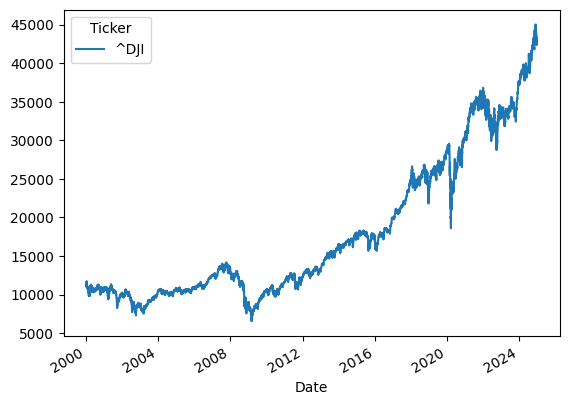

In [5]:
dji['Close'].plot()

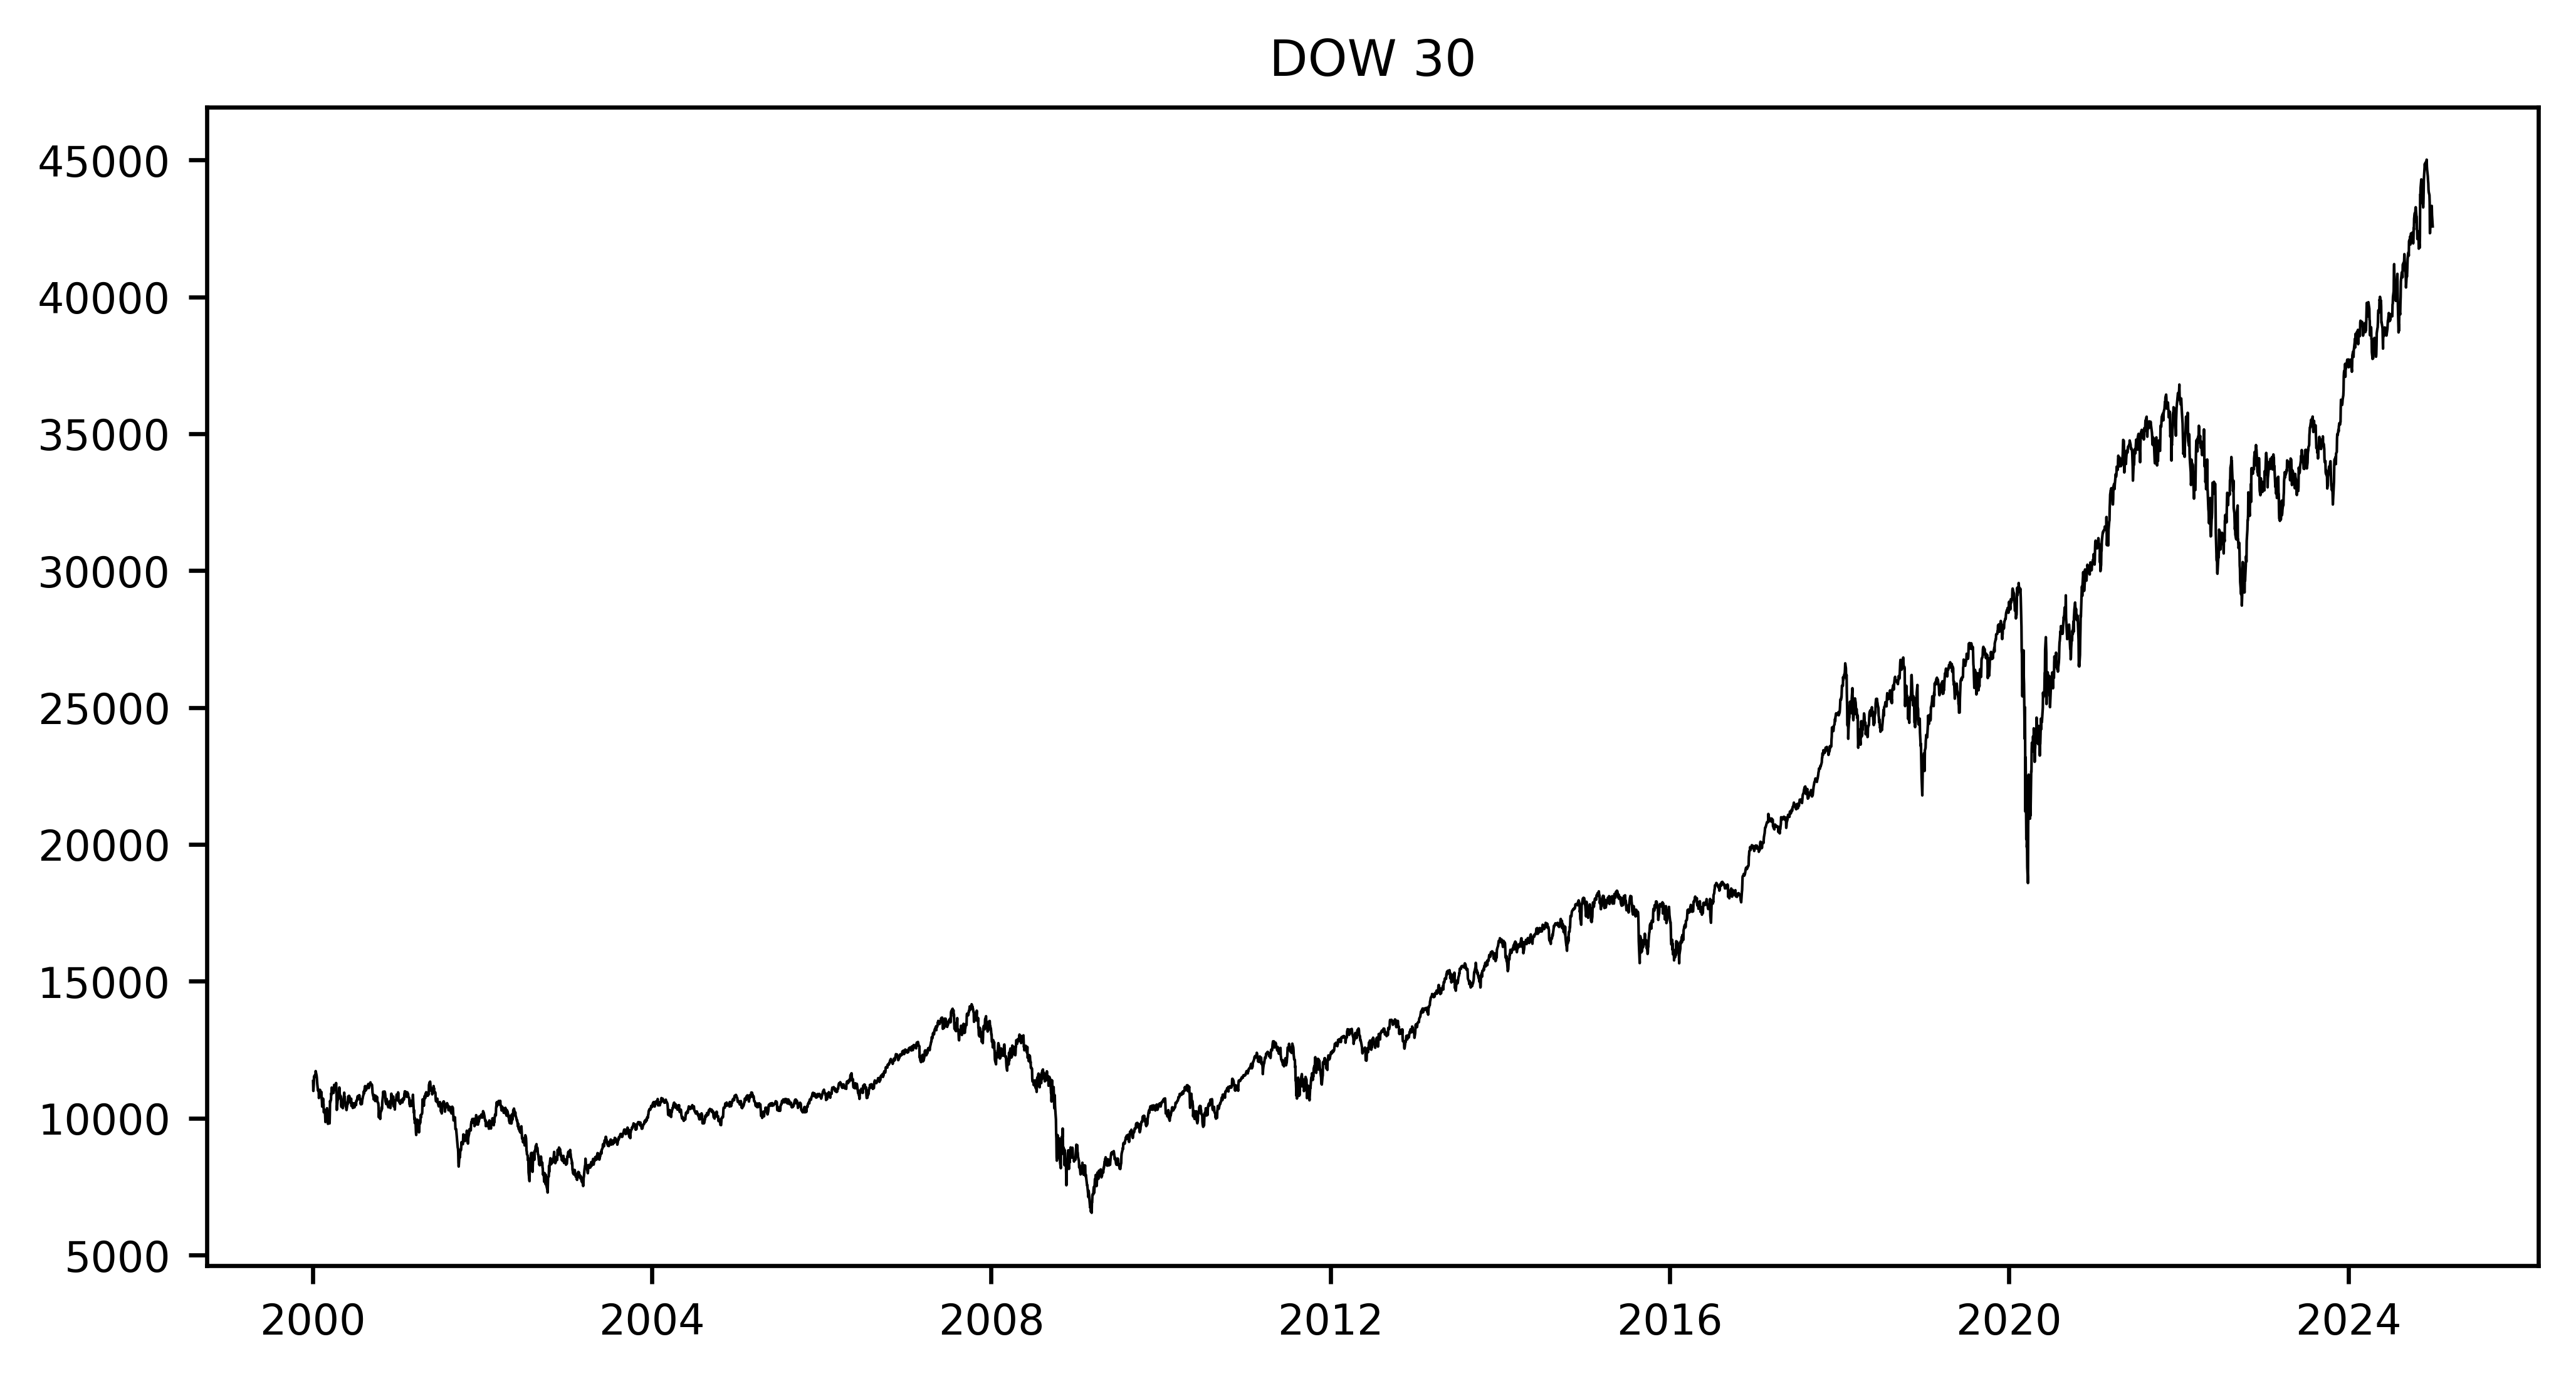

In [22]:
import scienceplots
import matplotlib.pylab as plt
with plt.style.context( 'ieee','science'):
    plt.rcParams.update({
    "font.family": "sans-serif",  
    "font.serif": ["Times"],  
    })   
    fig,ax = plt.subplots(figsize=(8,4))
    plt.plot(dji['Close'],linewidth=0.5)
    plt.title('DOW 30')
    plt.savefig('dow_30.png',dpi=300)
    plt.show()